In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!file -i /home/train_data.csv

/home/train_data.csv: text/csv; charset=utf-8


In [3]:
df=pd.read_csv("/home/train_data.csv")
df

,Unnamed: 0,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
6995,6996,The Fallen Ones (2005),horror,"Five thousand years ago, in Sumer, the fallen..."
6996,6997,The American Invasion (2012),documentary,"In 1942, the US Air Force - the largest airfa..."
6997,6998,Bourek (2015),comedy,"In this humanistic comedy, set against the ba..."
6998,6999,Little Murders (1971),comedy,A girl brings home her latest boyfriend to me...


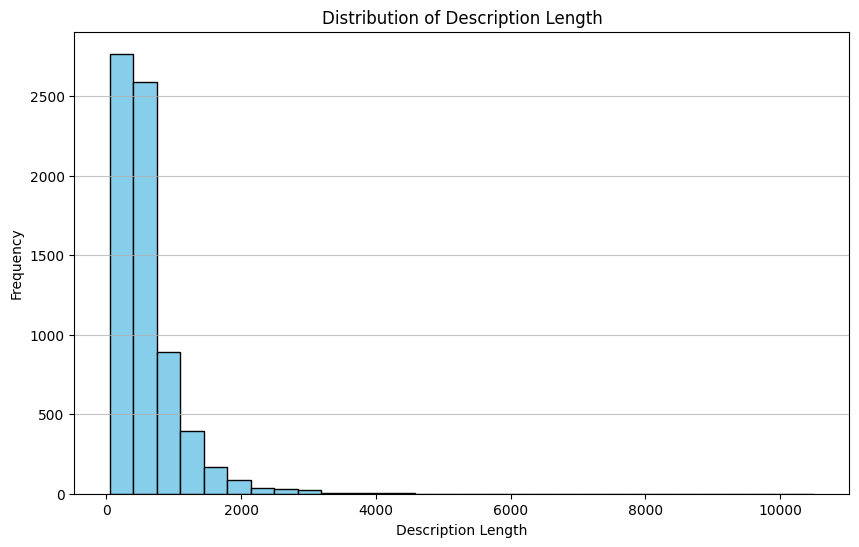

In [4]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['DESCRIPTION_length'] = df['DESCRIPTION'].str.len()

plt.figure(figsize=(10, 6))
plt.hist(df['DESCRIPTION_length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.title('Distribution of Description Length')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          7000 non-null   int64 
 1   TITLE               7000 non-null   object
 2   GENRE               7000 non-null   object
 3   DESCRIPTION         7000 non-null   object
 4   DESCRIPTION_length  7000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 273.6+ KB


In [6]:
df['GENRE'].value_counts()

 drama           1710
 documentary     1700
 comedy           968
 short            653
 horror           287
 thriller         248
 action           160
 western          140
 reality-tv       117
 family            99
 adventure         95
 music             91
 sci-fi            89
 adult             84
 romance           71
 animation         60
 sport             57
 crime             53
 talk-show         51
 fantasy           46
 mystery           45
 biography         42
 musical           37
 history           33
 game-show         28
 news              20
 war               16
Name: GENRE, dtype: int64

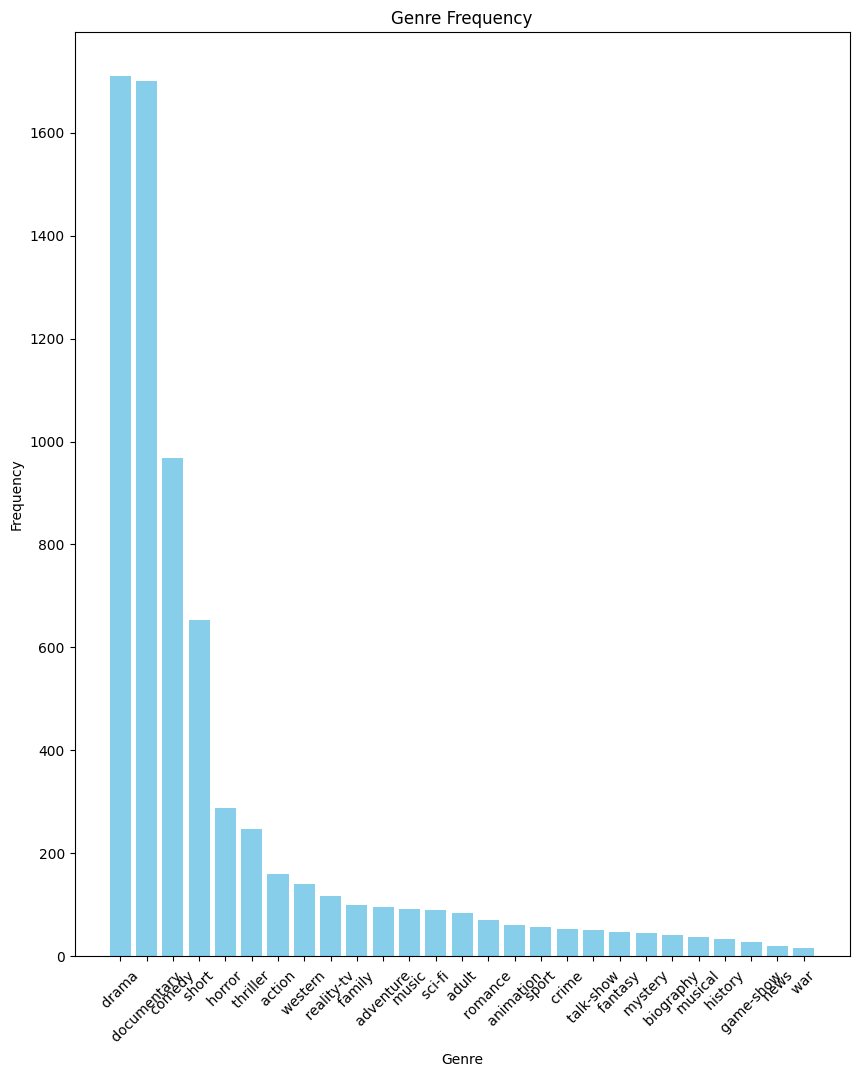

In [7]:
# Plotting
plt.figure(figsize=(10,12))
genre_counts = df['GENRE'].value_counts()
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Genre Frequency')
plt.xticks(rotation=45)
plt.show()


In [8]:

df['DESCRIPTION'].describe()

count                                                  7000
unique                                                 6997
top        Olga, Masha, and Irina Prozoroff lead lonely ...
freq                                                      2
Name: DESCRIPTION, dtype: object

In [9]:
df['msg_length'] = df['DESCRIPTION'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)


In [10]:
df['msg_length'].describe()

count     7000.000000
mean       608.438000
std        462.300608
min         48.000000
25%        324.000000
50%        466.000000
75%        719.250000
max      10504.000000
Name: msg_length, dtype: float64

array([[<Axes: title={'center': ' action '}>,
        <Axes: title={'center': ' adult '}>,
        <Axes: title={'center': ' adventure '}>,
        <Axes: title={'center': ' animation '}>,
        <Axes: title={'center': ' biography '}>],
       [<Axes: title={'center': ' comedy '}>,
        <Axes: title={'center': ' crime '}>,
        <Axes: title={'center': ' documentary '}>,
        <Axes: title={'center': ' drama '}>,
        <Axes: title={'center': ' family '}>],
       [<Axes: title={'center': ' fantasy '}>,
        <Axes: title={'center': ' game-show '}>,
        <Axes: title={'center': ' history '}>,
        <Axes: title={'center': ' horror '}>,
        <Axes: title={'center': ' music '}>],
       [<Axes: title={'center': ' musical '}>,
        <Axes: title={'center': ' mystery '}>,
        <Axes: title={'center': ' news '}>,
        <Axes: title={'center': ' reality-tv '}>,
        <Axes: title={'center': ' romance '}>],
       [<Axes: title={'center': ' sci-fi '}>,
        <A

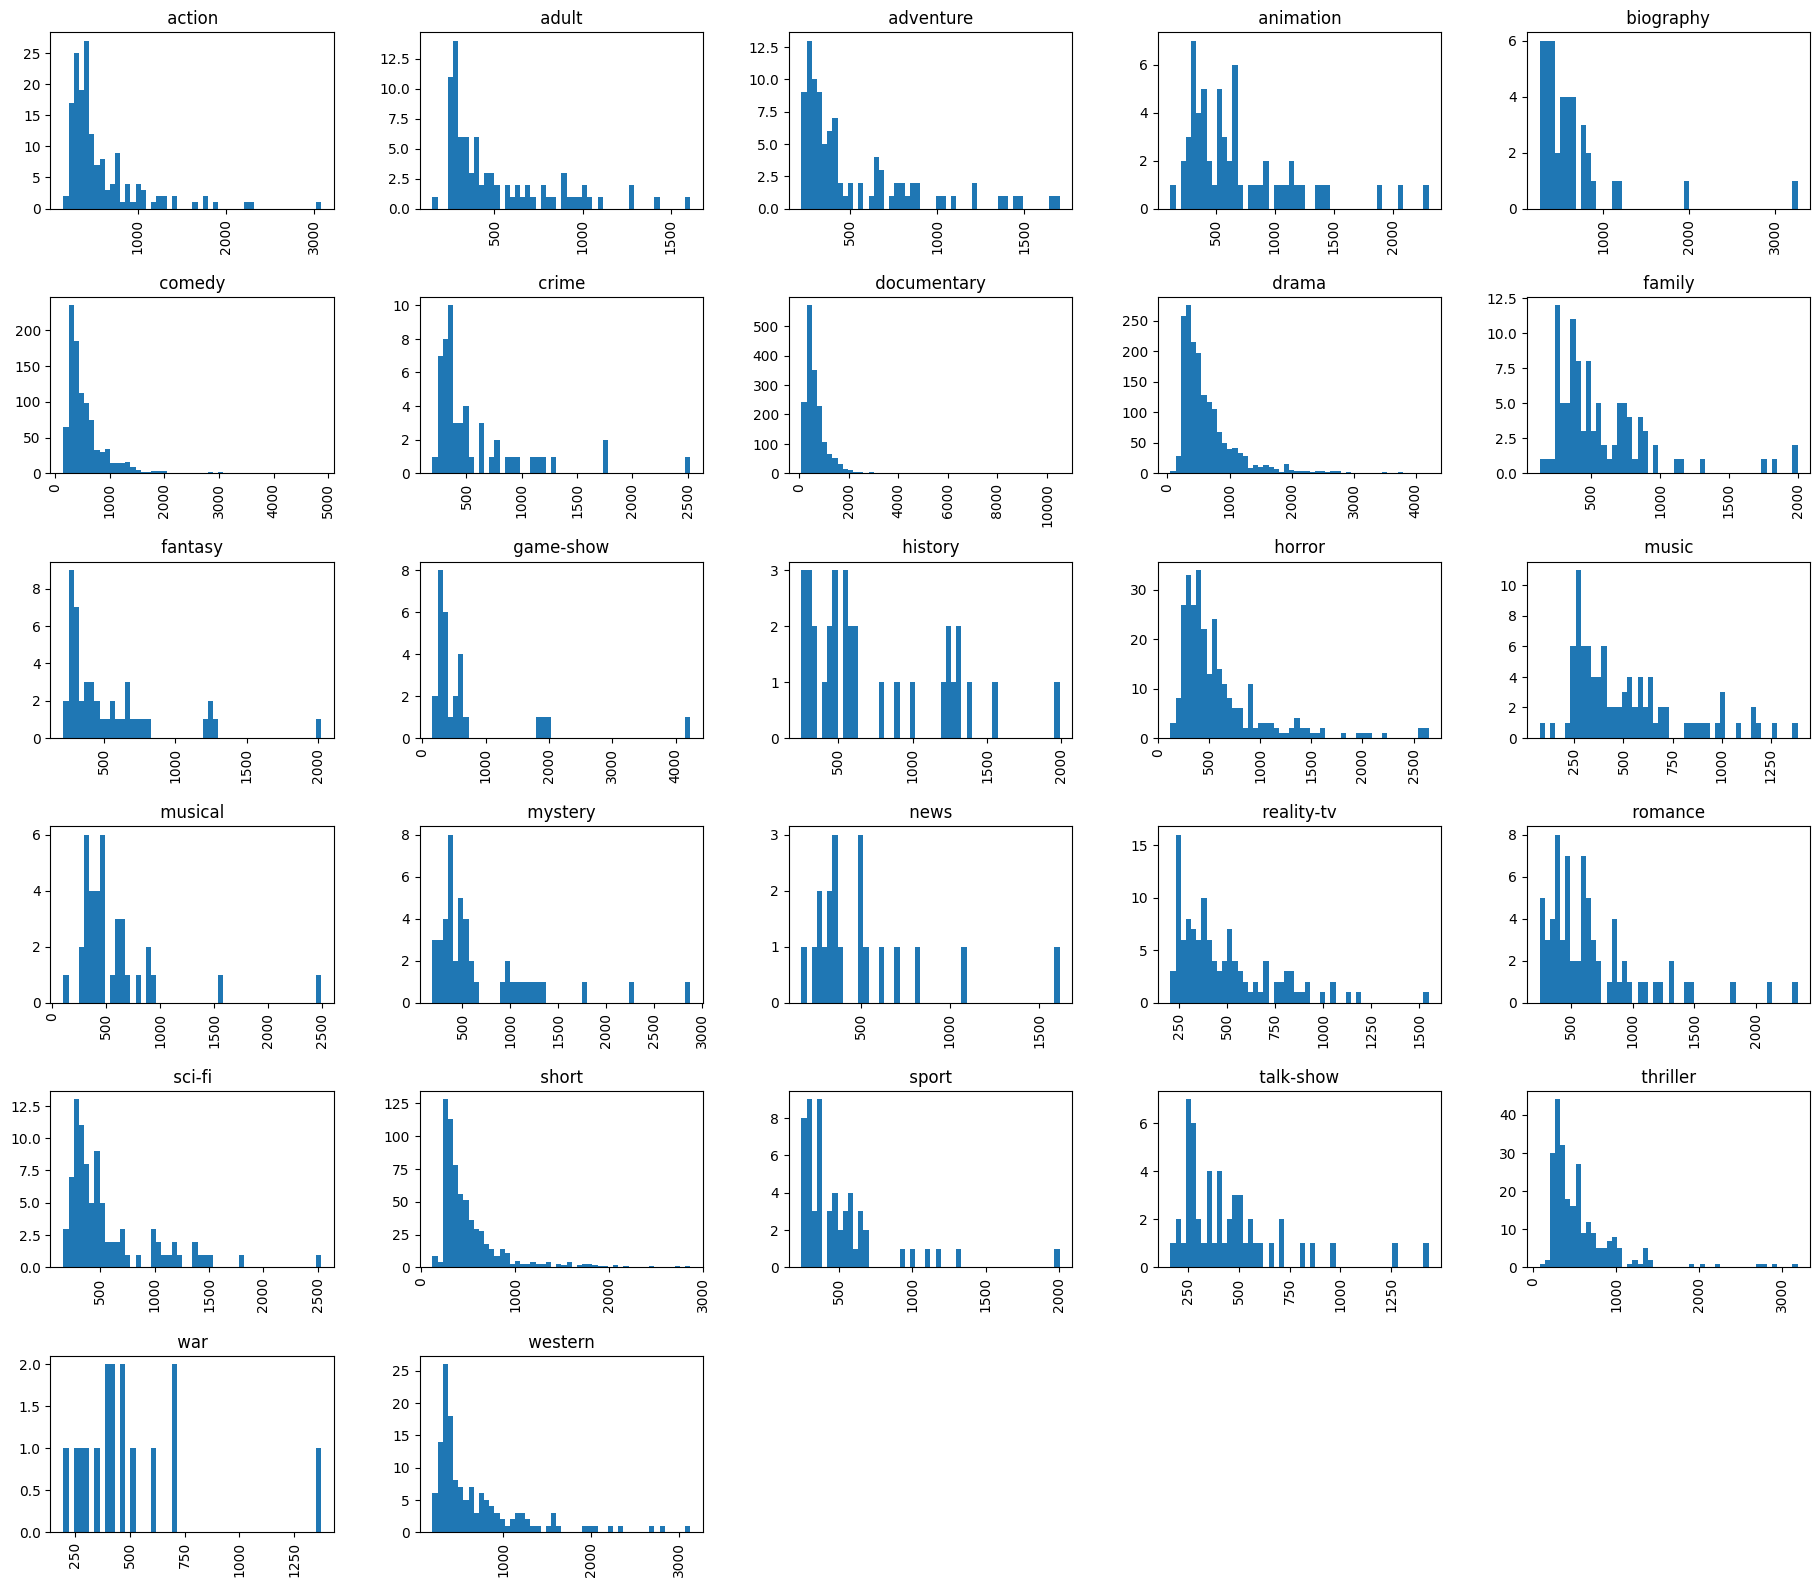

In [11]:
df.hist(column='msg_length', by='GENRE', bins=50,figsize=(22,20))

In [12]:
import re
import string

def preprocess_text(text):
    # Check if the input is a string
    if not isinstance(text, str):
        return ""

    # Convert text to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r"<[^>]+>", "", text)

    # Remove special characters, numbers, and URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"http\S+", "", text)

    return text

# Convert the 'DESCRIPTION' column to lowercase
df['DESCRIPTION'] = df['DESCRIPTION'].str.lower()

# Apply the preprocessing function to the 'DESCRIPTION' column
df['Cleaned_Description'] = df['DESCRIPTION'].apply(preprocess_text)

# Display the DataFrame with cleaned descriptions
print(df['Cleaned_Description'])


0        listening in to a conversation between his do...
1        a brother and sister with a past incestuous r...
2        as the bus empties the students for their fie...
3        to help their unemployed father make ends mee...
4        the films title refers not only to the unreco...
                              ...                        
6995     five thousand years ago in sumer the fallen a...
6996     in  the us air force  the largest airfare in ...
6997     in this humanistic comedy set against the bac...
6998     a girl brings home her latest boyfriend to me...
6999     munabia  a beautiful image of a strong indepe...
Name: Cleaned_Description, Length: 7000, dtype: object


# Data preprocessing

In [13]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenize function
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization to the 'text_column' and create a new column 'tokens'
df['tokens'] = df['Cleaned_Description'].apply(tokenize_text)

# Print the DataFrame with tokens
print(df[ 'tokens'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       [listening, in, to, a, conversation, between, ...
1       [a, brother, and, sister, with, a, past, inces...
2       [as, the, bus, empties, the, students, for, th...
3       [to, help, their, unemployed, father, make, en...
4       [the, films, title, refers, not, only, to, the...
                              ...                        
6995    [five, thousand, years, ago, in, sumer, the, f...
6996    [in, the, us, air, force, the, largest, airfar...
6997    [in, this, humanistic, comedy, set, against, t...
6998    [a, girl, brings, home, her, latest, boyfriend...
6999    [munabia, a, beautiful, image, of, a, strong, ...
Name: tokens, Length: 7000, dtype: object


In [14]:
from nltk.corpus import stopwords

In [15]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the stopwords list if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a list of words
def remove_stopwords(words):
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words

# Apply the function to the 'Cleaned_Description' column
df['msg_without_stopwords'] = df['tokens'].apply(remove_stopwords)

# Print the DataFrame with messages without stopwords
print(df['msg_without_stopwords'])



[nltk_data] Downloading package stopwords to /root/nltk_data...


0       [listening, conversation, doctor, parents, yea...
1       [brother, sister, past, incestuous, relationsh...
2       [bus, empties, students, field, trip, museum, ...
3       [help, unemployed, father, make, ends, meet, e...
4       [films, title, refers, unrecovered, bodies, gr...
                              ...                        
6995    [five, thousand, years, ago, sumer, fallen, an...
6996    [us, air, force, largest, airfare, world, arri...
6997    [humanistic, comedy, set, backdrop, economic, ...
6998    [girl, brings, home, latest, boyfriend, meet, ...
6999    [munabia, beautiful, image, strong, independen...
Name: msg_without_stopwords, Length: 7000, dtype: object


[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Download the WordNet corpus if not already downloaded
nltk.download('wordnet')

# Function to apply lemmatization to a list of words
def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words

# Apply lemmatization to the 'msg_without_stopwords' column
df['lemmatized_text'] = df['msg_without_stopwords'].apply(lemmatize_words)

# Print the DataFrame
print(df['lemmatized_text'])


[nltk_data] Downloading package wordnet to /root/nltk_data...


0       [listening, conversation, doctor, parent, year...
1       [brother, sister, past, incestuous, relationsh...
2       [bus, empty, student, field, trip, museum, nat...
3       [help, unemployed, father, make, end, meet, ed...
4       [film, title, refers, unrecovered, body, groun...
                              ...                        
6995    [five, thousand, year, ago, sumer, fallen, ang...
6996    [u, air, force, largest, airfare, world, arriv...
6997    [humanistic, comedy, set, backdrop, economic, ...
6998    [girl, brings, home, latest, boyfriend, meet, ...
6999    [munabia, beautiful, image, strong, independen...
Name: lemmatized_text, Length: 7000, dtype: object


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert list of lists to list of strings
lemmatized_texts = [' '.join(words) for words in df['lemmatized_text']]

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.95, ngram_range=(1, 3), max_features=5000)

# Use the TfidfVectorizer object to transform your text data
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_texts)
tfidf_matrix.shape

(7000, 5000)

In [18]:
tfidf_vectorizer.get_feature_names_out()[:10]

array(['abandon', 'abandoned', 'abducted', 'abduction', 'ability', 'able',
       'aboard', 'aboriginal', 'abraham', 'abroad'], dtype=object)

In [19]:
train_tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [20]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'GENRE' is the column containing genre labels
label_encoder = LabelEncoder()
label_classes = label_encoder.fit_transform(df["GENRE"])

# Check the number of unique classes
num_unique_classes = len(np.unique(label_classes))


In [21]:
label_classes

array([ 8, 24,  1, ...,  5,  5,  8])

In [22]:
num_unique_classes = np.unique(label_classes)
num_unique_classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

# Model building

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'labels' is a DataFrame or Series containing the labels for your data
# Split the TF-IDF matrix and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_tfidf_df, label_classes, test_size=0.2, random_state=42)
X_train

,abandon,abandoned,abducted,abduction,ability,able,aboard,aboriginal,abraham,abroad,...,youngest,youngster,youre,youth,youtube,youve,zealand,zombie,zone,zoo
1032,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
6339,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
3886,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2288,0.0,0.0,0.0,0.0,0.0,0.0
2653,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
6914,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
5226,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:

# Create a logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5185714285714286


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5185714285714286


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[  0   0   0   0   0   4   0   7  24   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   8   0   3   7   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   1   0   3  10   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   2   0   1   6   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   5   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  89   0  24  77   0   0   0   0   1   0   0   0   0
    0   0   0   3   0   0   0   0   0]
 [  0   0   0   0   0   3   0   1   8   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   7   0 313  36   0   0   0   0   0   0   0   0   0
    0   0   0   3   0   0   0   0   0]
 [  0   0   0   0   0  31   0  38 287   0   0   0   0   0   0   0   0   0
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Make predictions on the test data
y_pred = model.predict(X_train)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.65875


In [28]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [29]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.48428571428571426


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[  0   0   0   0   0   1   0   7  28   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   3  14   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4  11   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   8   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   5   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  37   0  32 125   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1  11   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0 316  39   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  34 323   0   0   0   0   0   0   0   0   0
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Make predictions on the test data
y_pred = model.predict(X_train)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5167857142857143


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the Naive Bayes classifier
nb = MultinomialNB()

# Define the parameter grid to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'alpha': 0.1}
Best Score: 0.49857142857142855


In [33]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




In [34]:
# Define the XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, seed=42)



In [ ]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.49785714285714283


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[  1   0   0   0   0   2   0   5  24   0   0   0   0   0   0   0   0   0
    1   0   0   1   0   0   2   0   0]
 [  0   0   4   0   0   6   0   3   4   0   0   0   0   0   0   0   0   0
    0   0   0   2   0   0   0   0   0]
 [  0   0   1   0   0   1   0   2   8   0   0   0   0   1   0   0   0   0
    0   0   0   1   0   0   0   0   1]
 [  0   0   1   0   0   2   0   2   3   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   5   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  89   0  22  73   0   0   1   0   1   0   0   0   1
    0   0   0   5   0   0   1   1   0]
 [  0   0   0   0   0   2   0   2   7   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0  12   0 281  41   0   0   0   0   2   1   1   1   0
    0   0   1  18   0   1   0   0   0]
 [  2   2   0   0   0  39   0  33 258   0   0   0   0   4   0   0   0   0
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [ ]:
print(X)

  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483
